# DEMO 1 - Logistic Regression Deduction
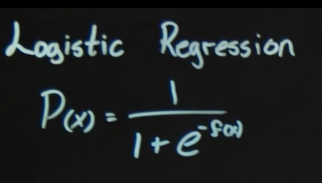

In [1]:
import pandas as pd                # for working with data in tabular form
import numpy as np                 # advance mathematics
import matplotlib.pyplot as plt    # chart creation
import seaborn as sns              # Complex chart creation

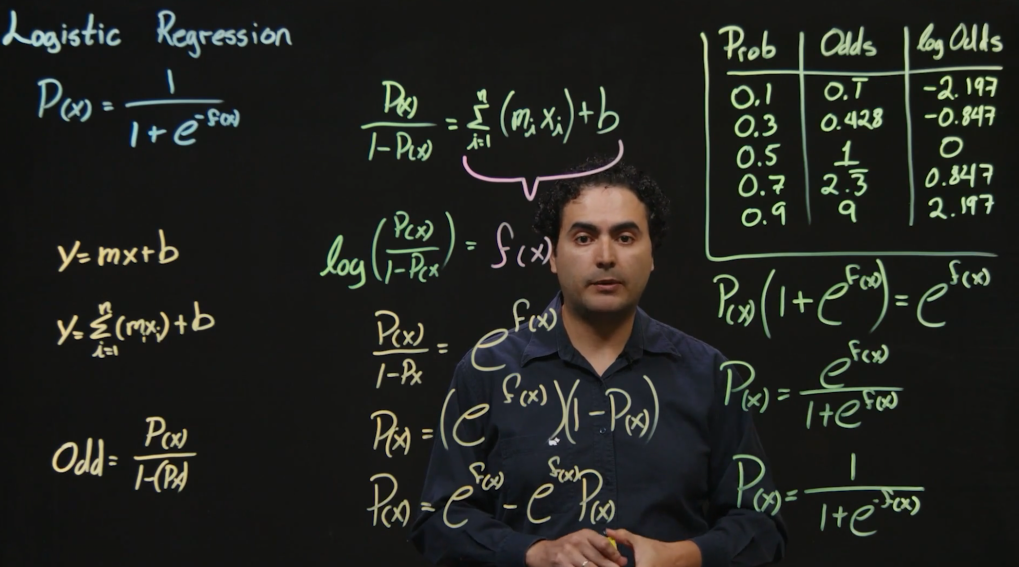

# DEMO 2 - continuation of Logistic Regression

In [5]:
data_url = 'https://raw.githubusercontent.com/edavgaun/RCEL_506/refs/heads/main/Module%209/bank-full.csv'
df = pd.read_csv(data_url, sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


# using get_dummies, we may able to convert categorical data into a dummy variables. Useful in ML models that requires numerical inputs.

In [9]:
# One Hot encoding technique
df2 = pd.get_dummies(df.housing, dtype=int)
df2.head()

,no,yes
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [12]:
# creating a new df (dummies) that does not include the target variable as noted by the df slicing at -1
dummies = pd.get_dummies(df.iloc[:,: -1])
dummies.shape

(45211, 51)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
x = dummies
y=df.iloc[: , -1]
clf = LogisticRegression(max_iter=100)
model = clf.fit(x,y)
score = model.score(x,y)
print(score)

0.8919068368317444


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x)
cm = confusion_matrix(y, y_pred)
cm


array([[39123,   799],
       [ 4088,  1201]])

In [18]:
(39123 + 1201) / len(df)

0.8919068368317444